In [ ]:
# Install required libraries quietly
!pip install -q ultralytics roboflow

import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
import os

# Verify GPU acceleration availability
ultralytics.checks()
print("Environment setup complete. GPU ready.")

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.3/112.6 GB disk)
Environment setup complete. GPU ready.


In [ ]:
# --- DATASET INGESTION ---
# Initialize Roboflow client and download the dataset
# NOTE: Replace the API key block below with your specific project code from Roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("carlos-zsur2").project("cow-lie-stand-walk-zyth8")
version = project.version(1)
dataset = version.download("yolov8")

print(f"Dataset downloaded successfully at: {dataset.location}")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cow-Lie-Stand-Walk-1 in yolov8:: 100%|██████████| 9876/9876 [00:01<00:00, 8625.01it/s] 

Dataset downloaded successfully at: /content/Cow-Lie-Stand-Walk-1


In [ ]:
# --- TRAINING PIPELINE ---

# 1. Load the pre-trained Nano model (optimized for speed/edge devices)
model = YOLO('yolov8n.pt')

# 2. Execute Transfer Learning
# epochs=15: Sufficient for PoC demonstration
# imgsz=640: Standard resolution for YOLOv8
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=15,
    imgsz=640,
    plots=True
)

print("Training pipeline completed.")

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Cow-Lie-Stand-Walk-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

--2025-12-02 13:28:10--  https://upload.wikimedia.org/wikipedia/commons/0/0c/Cow_female_black_white.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 908691 (887K) [image/jpeg]
Saving to: ‘test_cow.jpg’

test_cow.jpg        100%[===================>] 887.39K  --.-KB/s    in 0.1s    

2025-12-02 13:28:10 (8.20 MB/s) - ‘test_cow.jpg’ saved [908691/908691]


image 1/1 /content/test_cow.jpg: 448x640 2 1s, 39.1ms
Speed: 2.5ms preprocess, 39.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


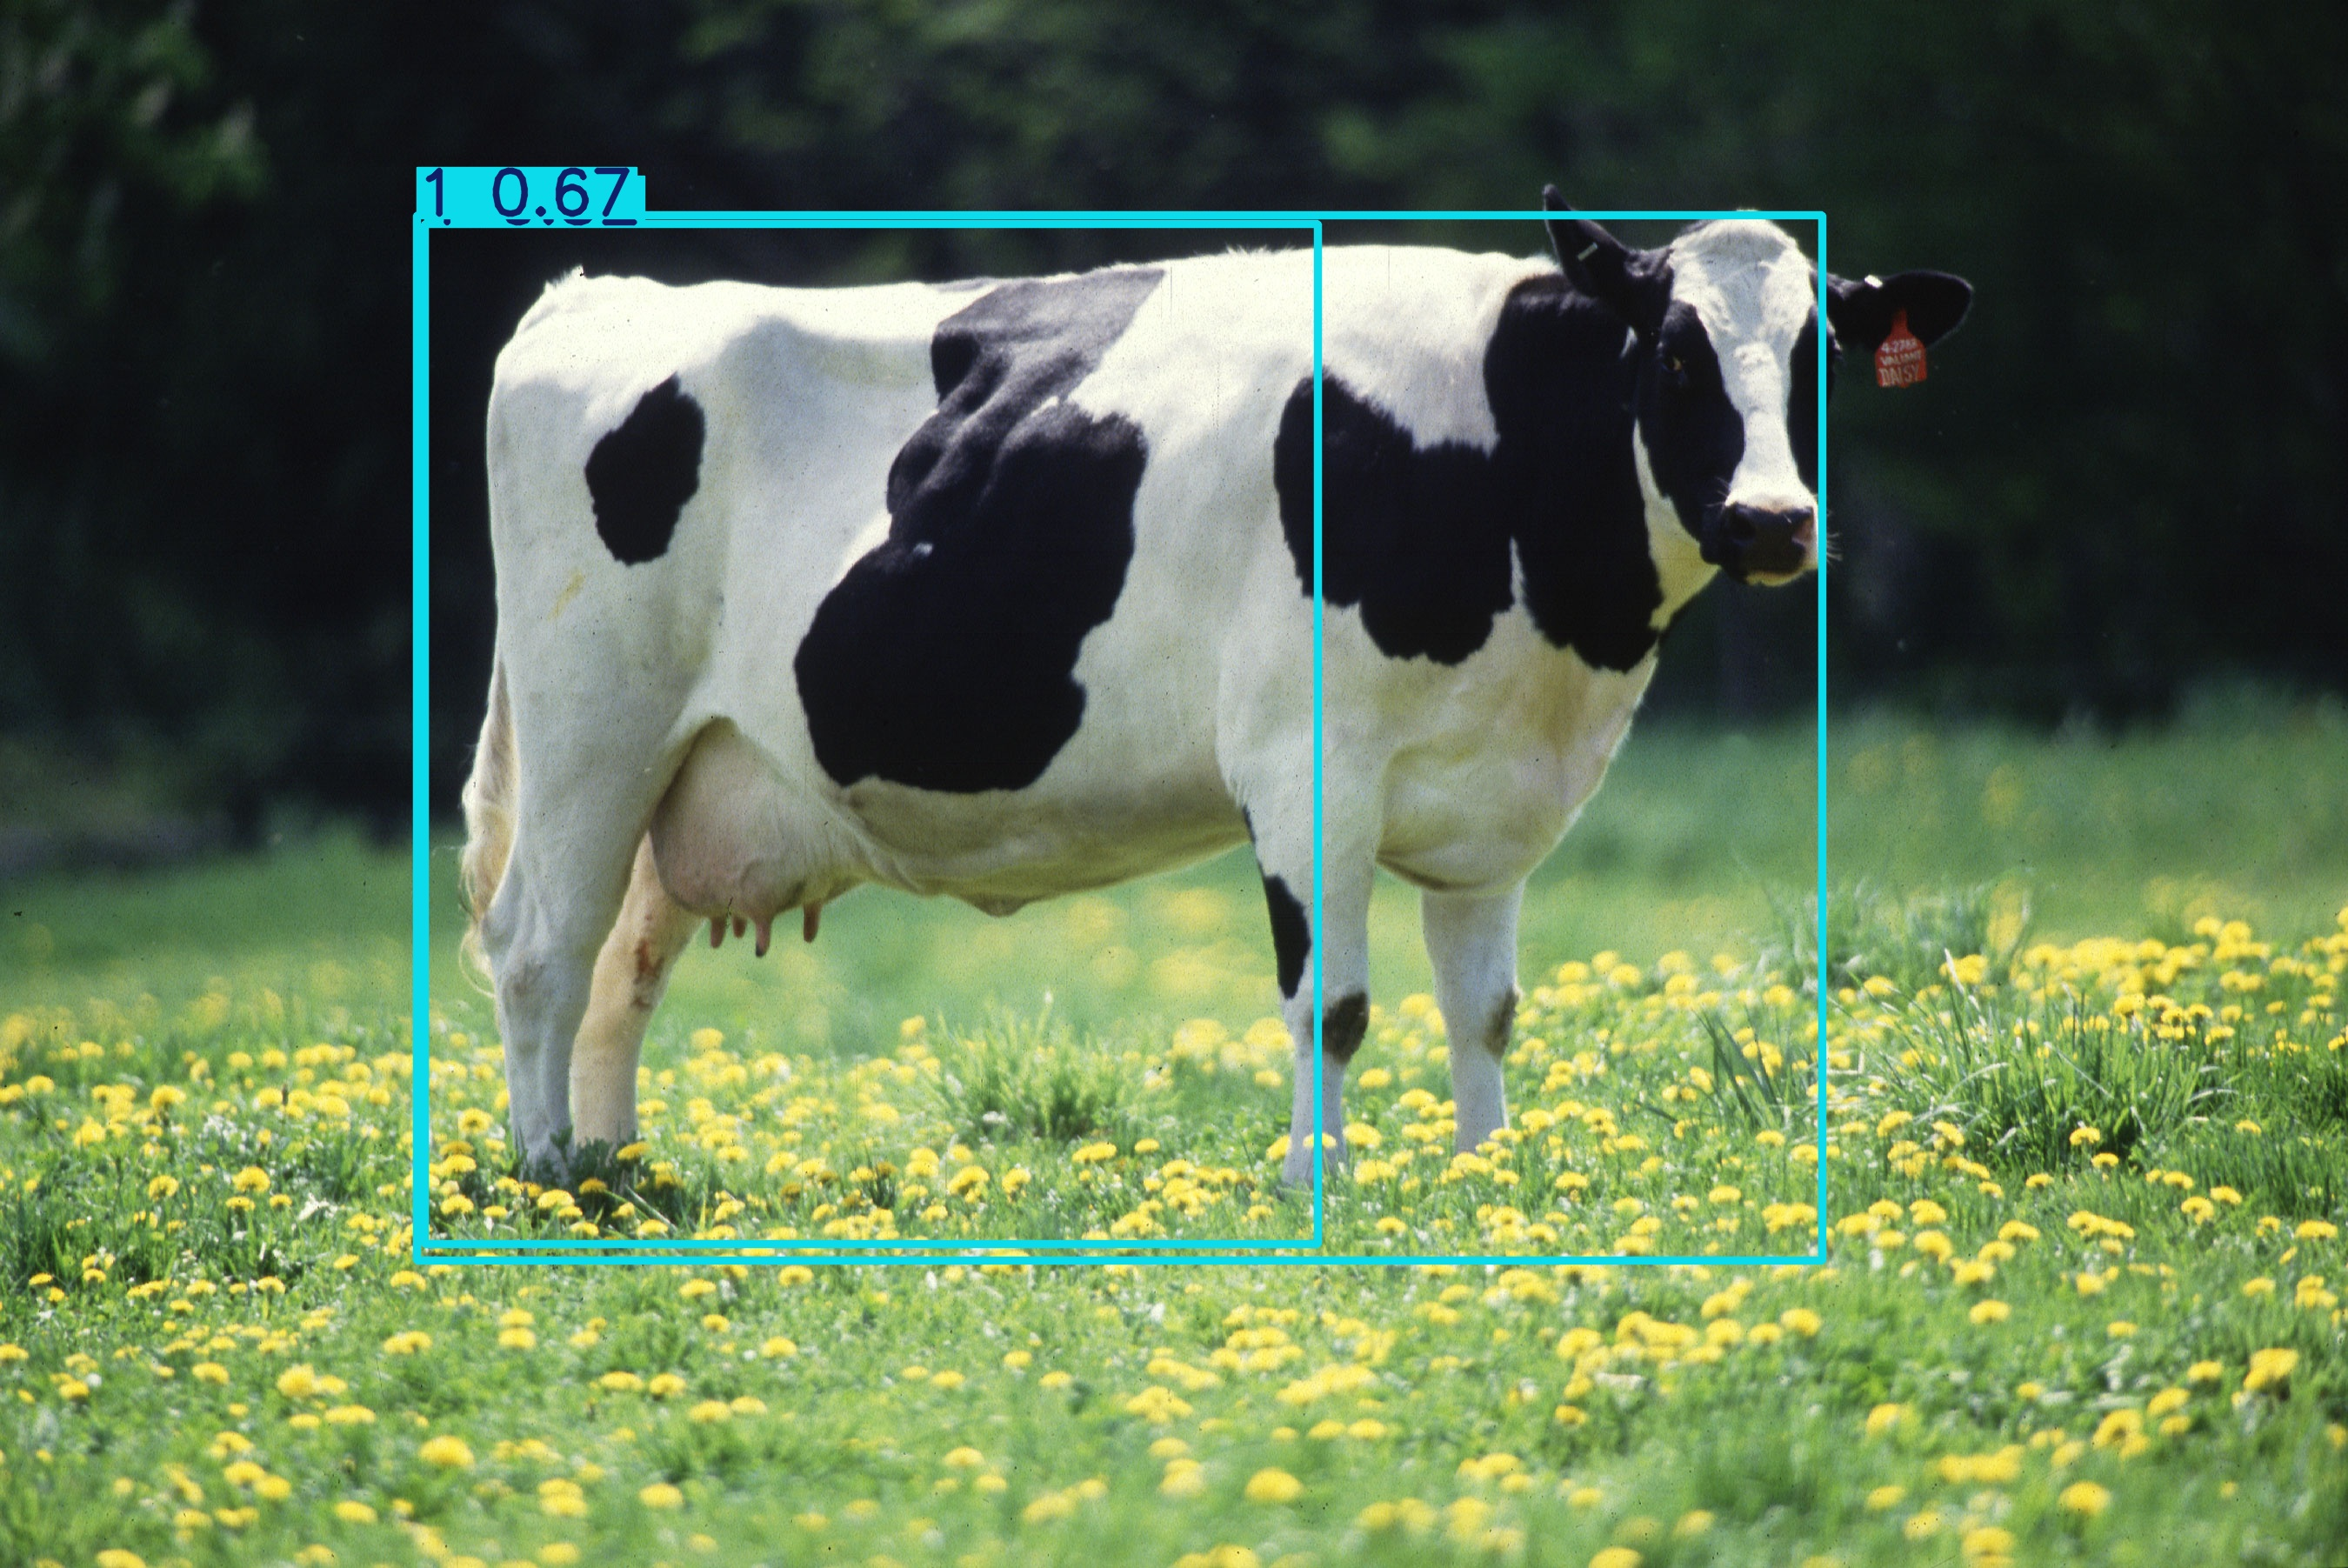

In [ ]:
# --- INFERENCE TEST ---

# Download a sample image from the web for validation
!wget -O test_cow.jpg "https://upload.wikimedia.org/wikipedia/commons/0/0c/Cow_female_black_white.jpg"

# Run inference with a confidence threshold of 0.5
results = model.predict(source="test_cow.jpg", conf=0.5, save=True)

# Display the resulting annotated image
# Logic to find the latest run directory automatically
import glob
from IPython.display import Image, display

latest_file = max(glob.glob('runs/detect/predict/*.jpg'), key=os.path.getctime)
display(Image(filename=latest_file, width=600))

In [ ]:
# --- MODEL EXPORT ---

# Define path to the best performing weights

from google.colab import files
best_weights_path = '/content/runs/detect/train/weights/best.pt'

if os.path.exists(best_weights_path):
    print(f"Downloading model weights from: {best_weights_path}")
    files.download(best_weights_path)
else:
    print("Error: Weights file not found. Check training logs.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>